<a href="https://colab.research.google.com/github/Ankit-03G/Stealth_1/blob/main/Evaluation_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install torch torchvision torchaudio
!pip install opencv-python
!pip install matplotlib seaborn
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import yaml
import os
import shutil
from pathlib import Path
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
import matplotlib.pyplot as plt
from google.colab import drive
import logging

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
# Download the model file
model_file_id = '1pefpfLiMi5KbHaINB_9QccKB-fcA-GVL'
model_destination = 'your_model.pt'
!gdown --id {model_file_id} -O {model_destination}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pefpfLiMi5KbHaINB_9QccKB-fcA-GVL
From (redirected): https://drive.google.com/uc?id=1pefpfLiMi5KbHaINB_9QccKB-fcA-GVL&confirm=t&uuid=eca3d403-f634-4dc6-bb52-3391fdf93340
To: /content/your_model.pt
100% 195M/195M [00:04<00:00, 46.4MB/s]


In [ ]:
# Download broadcast.mp4
broadcast_file_id = '14mRnA1-BqhvpnO_VYn3Q0uUKA0u0BXFY'
broadcast_destination = '/content/videos/broadcast.mp4'
os.makedirs('/content/videos', exist_ok=True)
!gdown --id {broadcast_file_id} -O {broadcast_destination}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14mRnA1-BqhvpnO_VYn3Q0uUKA0u0BXFY
To: /content/videos/broadcast.mp4
100% 9.23M/9.23M [00:00<00:00, 29.0MB/s]


In [ ]:
# Download tacticam.mp4
tacticam_file_id = '1mBLZYL2ua2BDbhudFWeaoqYUvhlye_6s'
tacticam_destination = '/content/videos/tacticam.mp4'
os.makedirs('/content/videos', exist_ok=True)
!gdown --id {tacticam_file_id} -O {tacticam_destination}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mBLZYL2ua2BDbhudFWeaoqYUvhlye_6s
To: /content/videos/tacticam.mp4
100% 10.5M/10.5M [00:00<00:00, 24.5MB/s]


In [ ]:
# Check if the model file exists
if os.path.exists(model_destination):
    logger.info(f"Model file found at: {model_destination}")
else:
    logger.error(f"Model file not found at: {model_destination}")

# Check if the broadcast video file exists
if os.path.exists(broadcast_destination):
    logger.info(f"Broadcast video file found at: {broadcast_destination}")
else:
    logger.error(f"Broadcast video file not found at: {broadcast_destination}")

# Check if the tacticam video file exists
if os.path.exists(tacticam_destination):
    logger.info(f"Tacticam video file found at: {tacticam_destination}")
else:
    logger.error(f"Tacticam video file not found at: {tacticam_destination}")

In [ ]:
# Download the dataset from Google Drive
dataset_folder_id = '1l0911hD0ac9og9_S50TODyCvSMpqff0t'
dataset_destination = '/content/dataset'

# Using gdown to download the folder
!gdown --folder {dataset_folder_id} -O {dataset_destination}

logger.info(f"Dataset downloaded to: {dataset_destination}")

Retrieving folder contents
Processing file 1q_sMKVlGHjDCp3pu-NfgyOpEcRDX_RQ7 notes.json
Processing file 1OZnd_x4Ev2fgoNqv7W3rY0W3pbHQKuqU classes.txt
Retrieving folder 17gRILRGE3tiLi2lAFJo1cGNLrkjSwVt8 labels
Processing file 1E6CKpCIVa1a1S3Z75C8iNhfBW0DDFR6e 4508e804-broadcast_frame_0105.txt
Processing file 1SO9Sl-xk5yvNd61rOFpWabcsULhyN2Kz 7d2d5eea-broadcast_frame_0118.txt
Processing file 1tS3mwgWjYf0ulW-0WHZL1zYwKrqXcchE 4e07a438-broadcast_frame_0039.txt
Processing file 1Mpi-2kZpRiHvjZPBlzrv-L1bARNQdsYC b26a0ba5-tacticam_frame_0140.txt
Processing file 1sSxmFW9K4SQjX48XXNn9FFO9tEeiEiU0 fddc41c5-tacticam_frame_0060.txt
Processing file 1dPFO3FTmdJ_zPrg6H_myeOCf90QsFZeo 19d8e93c-tacticam_frame_0160.txt
Processing file 12PRMERDwl9ndkFwtz_NAMtpRQjy08NM7 69a0fe66-broadcast_frame_0079.txt
Processing file 16hQp6zeLgqLOQGOH704VPF5E9zCGwi_f 431a0079-tacticam_frame_0020.txt
Processing file 1Mqk8Qj6h3l3ILUy0cV069WcjjJGOkNvX 0307f20b-tacticam_frame_0000.txt
Processing file 1e9-Mf6XSLL_3olfhLUl2Ag-

In [ ]:
# Evaluate the model on the dataset
# Assuming the model is already loaded in the 'model' variable
# Assuming the dataset.yaml file is at yaml_file_path

logger.info(f"Evaluating model on dataset: {yaml_file_path}")

# The 'val' method is used for evaluation
results = model.val(data=yaml_file_path)

logger.info("Model evaluation completed.")
# The evaluation results are stored in the 'results' object
# You can access various metrics like results.maps, results.box.maps, etc.
print("\nEvaluation Results:")
print(results)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2886.4±454.0 MB/s, size: 382.5 KB)


val: Scanning /content/dataset/labels.cache... 20 images, 0 backgrounds, 11 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

val: /content/dataset/images/0307f20b-tacticam_frame_0000.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Possible class labels are 0-22
val: /content/dataset/images/0ced6b47-tacticam_frame_0180.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Possible class labels are 0-22
val: /content/dataset/images/19d8e93c-tacticam_frame_0160.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Possible class labels are 0-22
val: /content/dataset/images/2e279426-tacticam_frame_0080.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Possible class labels are 0-22
val: /content/dataset/images/4dd387e2-broadcast_frame_0013.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Possible class labels are 0-22
val: /content/dataset/images/52e77c19-broadcast_frame_0026.jpg: ignoring corrupt image/label: Label class 23 exceeds dataset class count 23. Pos


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


                   all          9        107      0.607      0.846      0.888      0.613
                  ball          8          8          1      0.414      0.513      0.291
             player: 1          9          9      0.397      0.556      0.609      0.361
            player: 10          1          1      0.581          1      0.995      0.895
            player: 11          1          1      0.394          1      0.995      0.796
            player: 12          7          7      0.811          1      0.995      0.683
            player: 13          8          8      0.661       0.75      0.841       0.63
            player: 14          8          8      0.514          1      0.995      0.727
            player: 15          8          8      0.411       0.75       0.64      0.336
            player: 16          8          8      0.544      0.875      0.837      0.619
            player: 17          8          8      0.527          1      0.891      0.537
            player: 1

In [ ]:
# Perform object detection on video clips
broadcast_video_path = '/content/videos/broadcast.mp4'
tacticam_video_path = '/content/videos/tacticam.mp4'
output_broadcast_dir = '/content/broadcast_detections'
output_tacticam_dir = '/content/tacticam_detections'

os.makedirs(output_broadcast_dir, exist_ok=True)
os.makedirs(output_tacticam_dir, exist_ok=True)

# Load the trained model (assuming best.pt was saved during training)
trained_model_path = model_destination # Use the variable with the path to the downloaded model
model = YOLO(trained_model_path)

# Process broadcast video
logger.info(f"Processing broadcast video: {broadcast_video_path}")
# Set save=False to prevent saving the default annotated video, keep save_txt=True
results_broadcast = model(broadcast_video_path, save=False, save_txt=True, project=output_broadcast_dir, exist_ok=True)

# Process tacticam video
logger.info(f"Processing tacticam video: {tacticam_video_path}")
# Set save=False to prevent saving the default annotated video, keep save_txt=True
results_tacticam = model(tacticam_video_path, save=False, save_txt=True, project=output_tacticam_dir, exist_ok=True)

logger.info("Object detection completed for both videos.")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/132) /content/videos/broadcast.mp4: 384x640 1 ball, 1 player: 1, 59.2ms
video 1/1 (frame 2/132) /content/videos/broadcast.mp4: 384x640 1 ball, 1 player: 1, 42.6ms
video 1/1 (frame 3/132) /content/videos/broadcast.mp4: 384x640 1 ball, 1 player: 1, 41.9ms
video 1/1 (frame 4/132) /content/videos/broadcast.mp4: 384x640 1 ball, 41.3ms
video 1/1 (frame 5/132) /content/videos/broadcast.mp4: 384x640 1 ball, 1 player: 1, 40.0ms
video 1/1 (fra

In [ ]:
import cv2
import os
import logging

logger = logging.getLogger(__name__)

# Paths to the generated AVI videos
broadcast_avi_path = os.path.join(output_broadcast_dir, 'predict', 'broadcast.avi')
tacticam_avi_path = os.path.join(output_tacticam_dir, 'predict', 'tacticam.avi')

# Output MP4 video paths
broadcast_mp4_path = '/content/Detected_broadcast.mp4'
tacticam_mp4_path = '/content/Detected_tacticam.mp4'

def convert_avi_to_mp4(avi_path, mp4_path):
    """Converts an AVI video file to MP4 format."""
    logger.info(f"Attempting to convert {avi_path} to {mp4_path}")

    if not os.path.exists(avi_path):
        logger.error(f"Input AVI file not found: {avi_path}")
        return

    cap = cv2.VideoCapture(avi_path)
    if not cap.isOpened():
        logger.error(f"Error: Could not open AVI file {avi_path}")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps <= 0:
        logger.warning(f"Warning: Could not get FPS from {avi_path}. Defaulting to 30.")
        fps = 30 # Default FPS if not available

    # Define the codec and create VideoWriter object
    # 'mp4v' is a common codec for MP4 that works in Colab
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(mp4_path, fourcc, fps, (frame_width, frame_height))

    if not out.isOpened():
         logger.error(f"Error: Could not create MP4 video writer for {mp4_path}. Make sure the codec is supported.")
         cap.release()
         return

    logger.info(f"Converting video frame by frame...")
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        frame_count += 1
        if frame_count % 100 == 0:
            logger.info(f"Processed {frame_count} frames...")

    # Release everything when job is finished
    cap.release()
    out.release()
    logger.info(f"Conversion completed. Total frames processed: {frame_count}. MP4 saved to {mp4_path}")

# Convert broadcast video
convert_avi_to_mp4(broadcast_avi_path, broadcast_mp4_path)

# Convert tacticam video
convert_avi_to_mp4(tacticam_avi_path, tacticam_mp4_path)

logger.info("Video conversion process finished.")

Total frames in video: 201


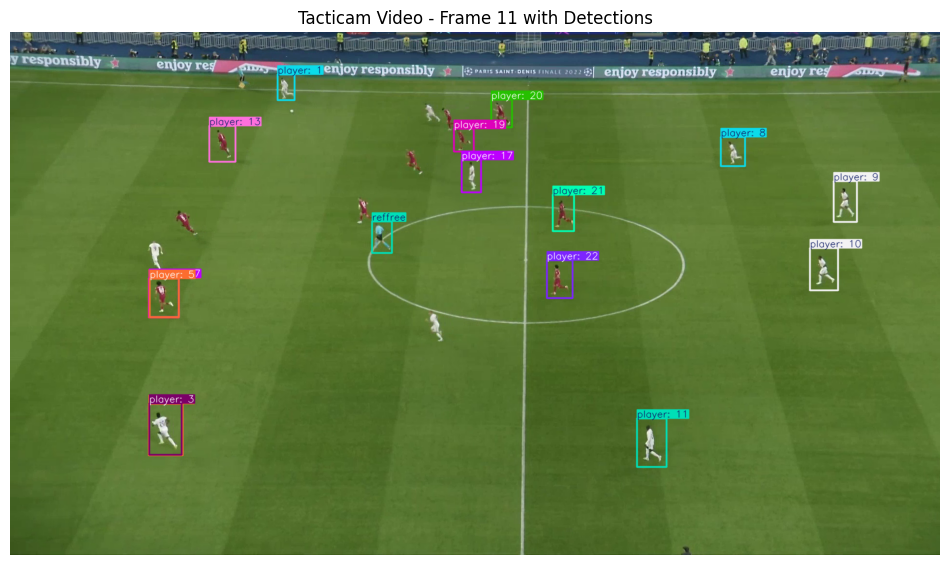

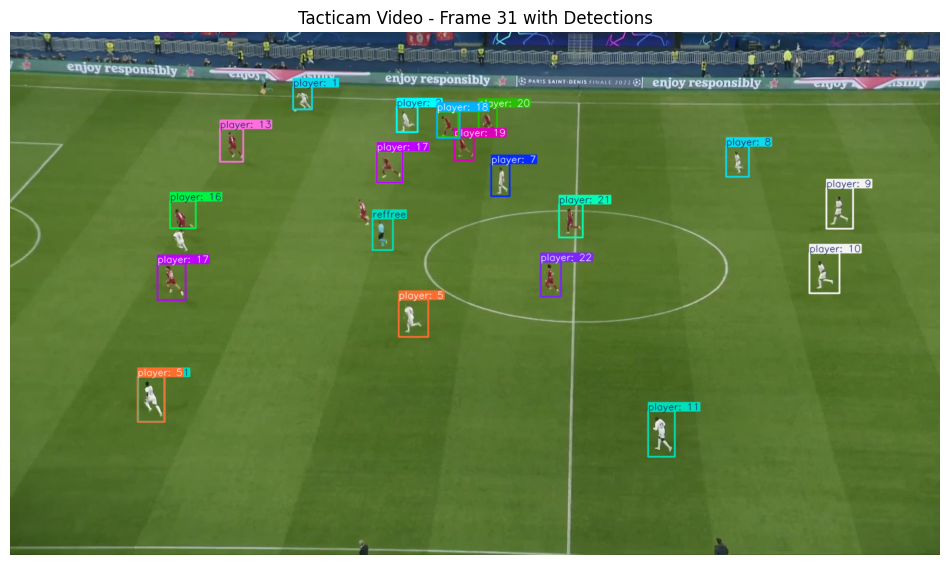

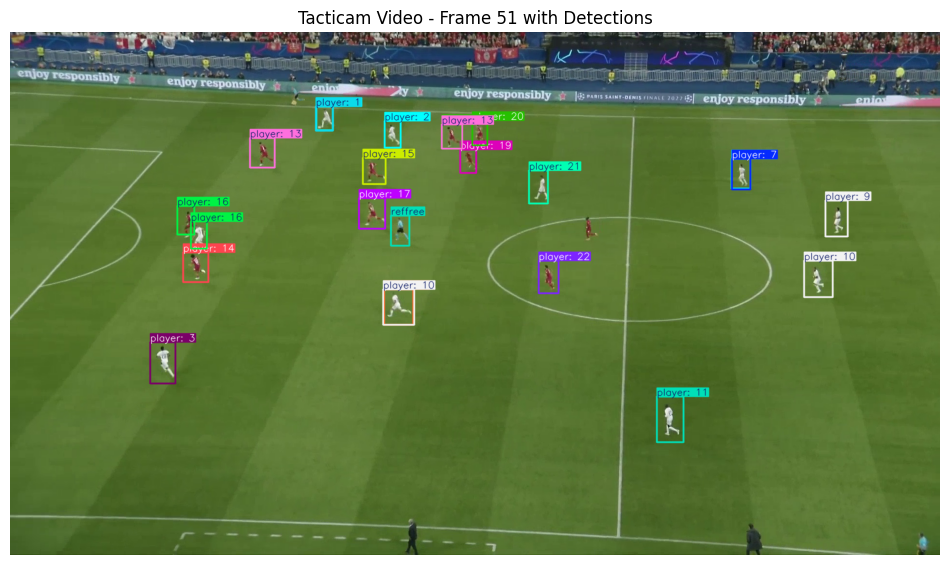

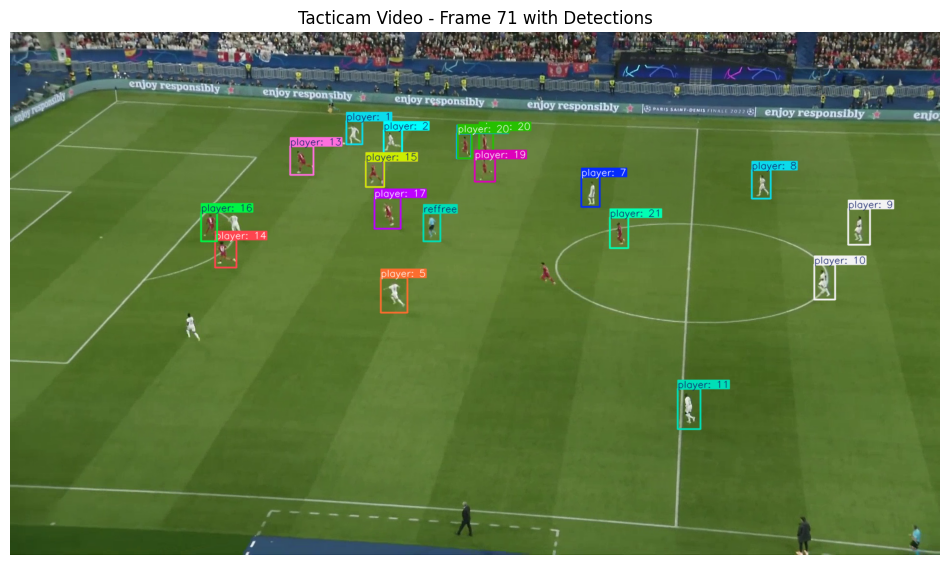

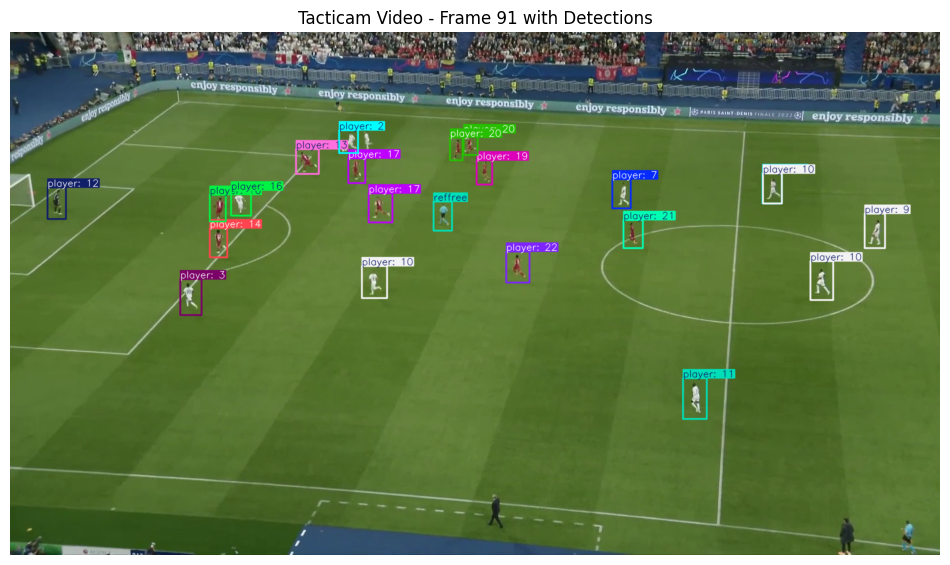

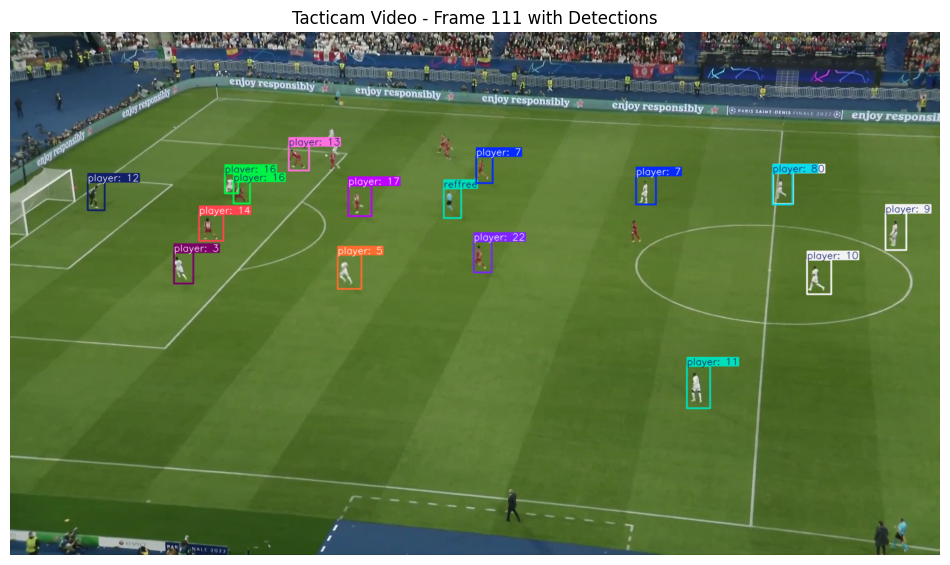

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator, colors

# Paths
tacticam_video_path = '/content/videos/tacticam.mp4'
tacticam_labels_dir = '/content/tacticam_detections/predict/labels' # Directory containing detection txt files

# Load class names (assuming you have the class names available, e.g., from the yaml file or dataset)
# We can reuse the class_names defined previously
# class_names = ['ball', 'player: 1', 'player: 10', 'player: 11', 'player: 12', 'player: 13', 'player: 14', 'player: 15', 'player: 16', 'player: 17', 'player: 18', 'player: 19', 'player: 2', 'player: 20', 'player: 21', 'player: 22', 'player: 3', 'player: 4', 'player: 5', 'player: 7', 'player: 8', 'player: 9', 'reffree']

# Assuming class_names is already defined in a previous cell and accessible.
# If not, uncomment the above definition or load it from the yaml/classes.txt

# Function to draw bounding boxes and labels on a frame (reusing the one defined previously)
# def draw_detections(frame, detections, img_shape, class_names):
#     annotator = Annotator(frame, line_width=2, example=class_names)
#     h, w = img_shape
#     for det in detections:
#         class_id, x_center, y_center, bbox_width, bbox_height = det
#         # Convert YOLO format (center_x, center_y, width, height normalized) to pixel coordinates (x1, y1, x2, y2)
#         x1 = int((x_center - bbox_width/2) * w)
#         y1 = int((y_center - bbox_height/2) * h)
#         x2 = int((x_center + bbox_width/2) * w)
#         y2 = int((y_center + bbox_height/2) * h)

#         # Check if class_id is within the valid range before accessing class_names
#         if 0 <= int(class_id) < len(class_names):
#             label = class_names[int(class_id)] # Get class name
#             annotator.box_label([x1, y1, x2, y2], label=label, color=colors(int(class_id), True))
#         else:
#             print(f"Warning: Detected object with invalid class_id: {int(class_id)}. Skipping annotation for this object.")

#     return annotator.result()


# Frames to display (0-indexed) - Displaying a few different frames
frames_to_show_0_indexed = [10, 30, 50, 70, 90, 110] # Example frames

# Open the video file
cap = cv2.VideoCapture(tacticam_video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {tacticam_video_path}")
else:
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {frame_count}")

    for frame_idx_0_indexed in frames_to_show_0_indexed:
        frame_idx_1_indexed = frame_idx_0_indexed + 1 # For printing user-friendly frame number

        if frame_idx_0_indexed < 0 or frame_idx_0_indexed >= frame_count:
            print(f"Warning: Frame index {frame_idx_1_indexed} is out of bounds for tacticam video.")
            continue

        # Read the specific frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx_0_indexed)
        ret, frame = cap.read()

        if ret:
            # Get image shape for converting normalized coordinates
            img_h, img_w, _ = frame.shape

            # Load detection data for this frame
            # YOLO saves labels as tacticam_<frame_number>.txt (0-indexed frame number after 'tacticam_')
            label_file = os.path.join(tacticam_labels_dir, f"tacticam_{frame_idx_0_indexed}.txt")
            detections = []
            if os.path.exists(label_file):
                with open(label_file, 'r') as f:
                    for line in f.read().splitlines():
                        # Format: class_id center_x center_y width height (normalized)
                        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                        detections.append((class_id, x_center, y_center, bbox_width, bbox_height))
            else:
                print(f"No detection labels found for frame {frame_idx_1_indexed} at {label_file}")

            # Draw detections on the frame (reusing the draw_detections function)
            annotated_frame = draw_detections(frame, detections, (img_h, img_w), class_names)

            # Display the annotated frame
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Tacticam Video - Frame {frame_idx_1_indexed} with Detections")
            plt.axis('off')
            plt.show()

        else:
            print(f"Error: Could not read frame {frame_idx_1_indexed} from tacticam video.")

    cap.release()

Total frames in video: 132


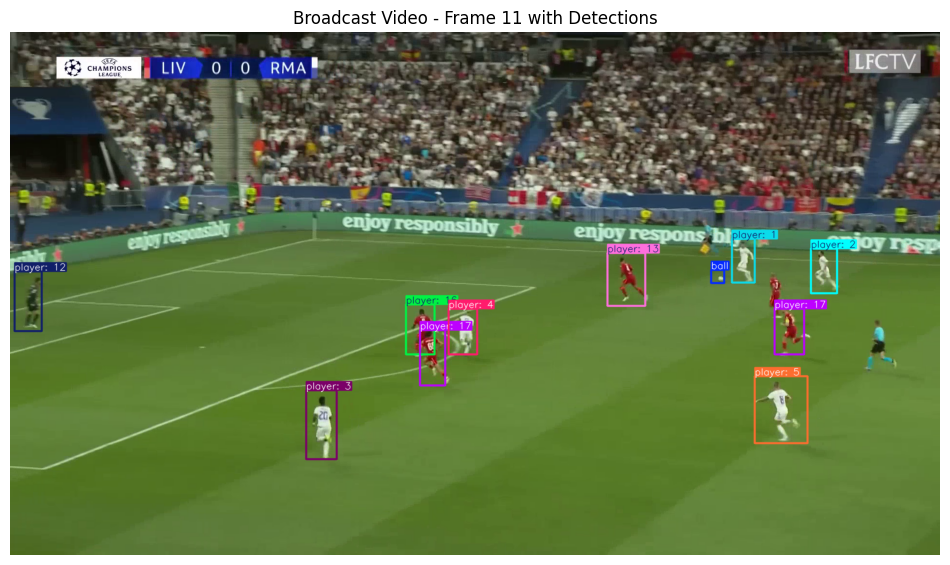

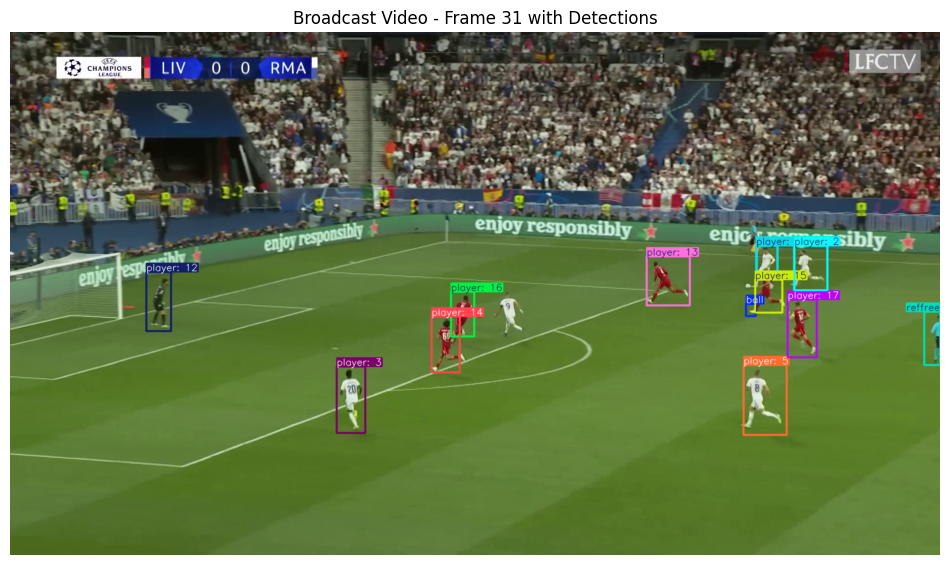

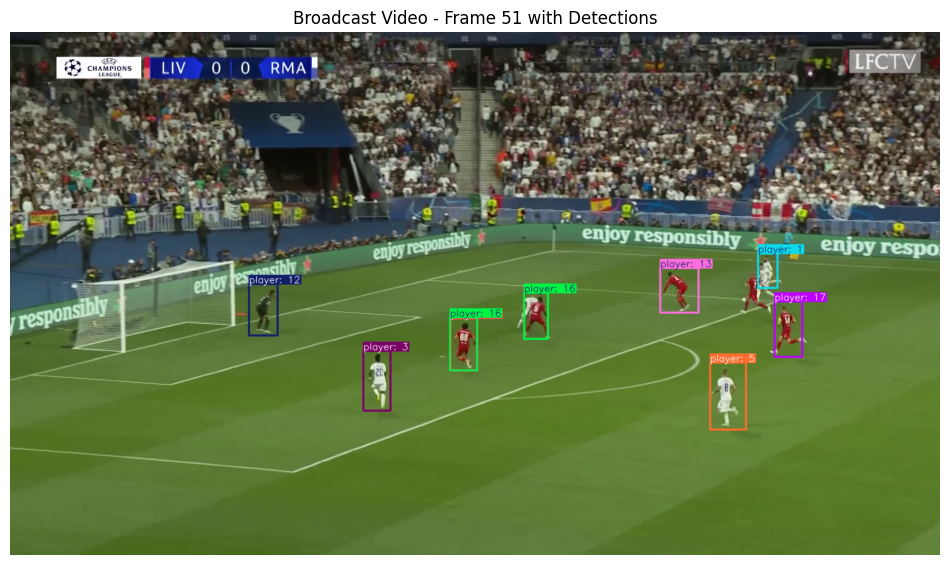

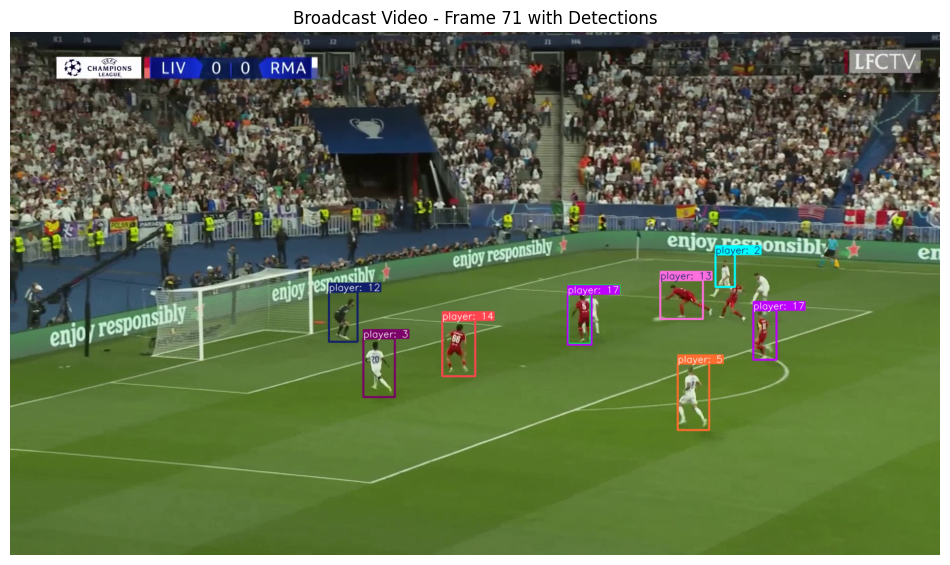

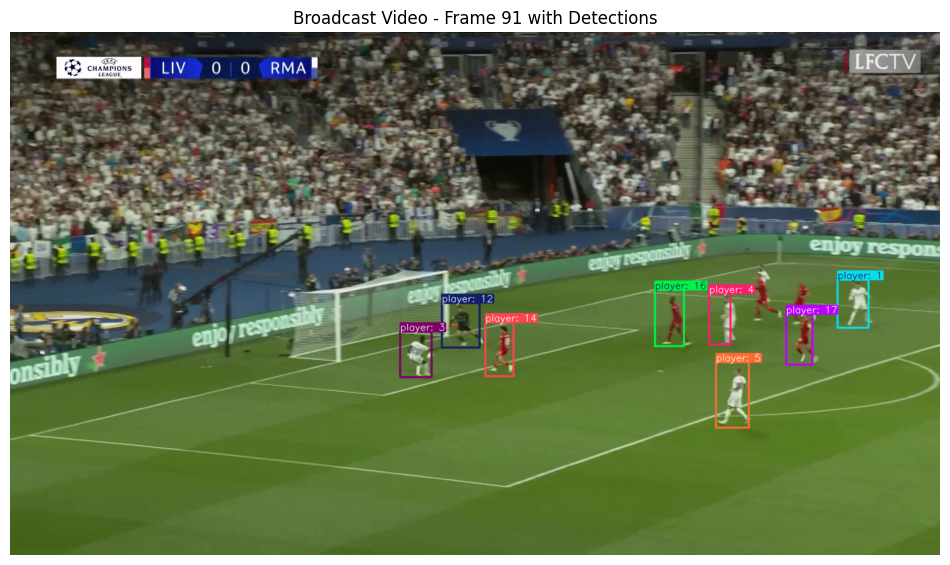

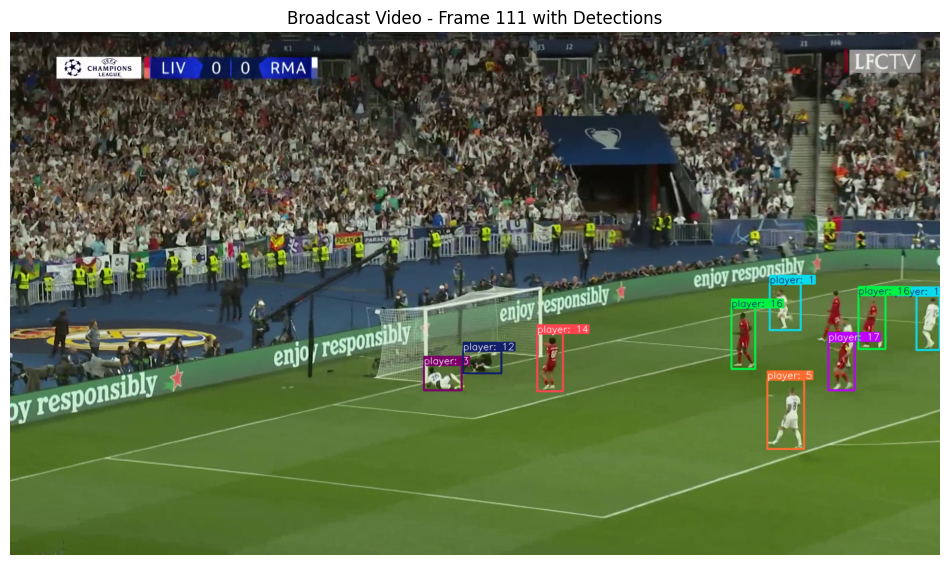

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Annotator, colors

# Paths
broadcast_video_path = '/content/videos/broadcast.mp4'
broadcast_labels_dir = '/content/broadcast_detections/predict/labels' # Directory containing detection txt files

# Load class names (assuming class_names and draw_detections are defined in a previous cell, e.g., s7vvx9vD10So)
# If not, make sure to run the cell where they are defined first.

# Frames to display (0-indexed) - Displaying a few different frames
frames_to_show_0_indexed = [10, 30, 50, 70, 90, 110] # Example frames

# Open the video file
cap = cv2.VideoCapture(broadcast_video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {broadcast_video_path}")
else:
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {frame_count}")

    for frame_idx_0_indexed in frames_to_show_0_indexed:
        frame_idx_1_indexed = frame_idx_0_indexed + 1 # For printing user-friendly frame number

        if frame_idx_0_indexed < 0 or frame_idx_0_indexed >= frame_count:
            print(f"Warning: Frame index {frame_idx_1_indexed} is out of bounds for broadcast video.")
            continue

        # Read the specific frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx_0_indexed)
        ret, frame = cap.read()

        if ret:
            # Get image shape for converting normalized coordinates
            img_h, img_w, _ = frame.shape

            # Load detection data for this frame
            # YOLO saves labels as broadcast_<frame_number>.txt (0-indexed frame number after 'broadcast_')
            label_file = os.path.join(broadcast_labels_dir, f"broadcast_{frame_idx_0_indexed}.txt")
            detections = []
            if os.path.exists(label_file):
                with open(label_file, 'r') as f:
                    for line in f.read().splitlines():
                        # Format: class_id center_x center_y width height (normalized)
                        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                        detections.append((class_id, x_center, y_center, bbox_width, bbox_height))
            else:
                print(f"No detection labels found for frame {frame_idx_1_indexed} at {label_file}")

            # Draw detections on the frame (reusing the draw_detections function)
            # Make sure draw_detections and class_names are defined before running this cell
            annotated_frame = draw_detections(frame, detections, (img_h, img_w), class_names)

            # Display the annotated frame
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Broadcast Video - Frame {frame_idx_1_indexed} with Detections")
            plt.axis('off')
            plt.show()

        else:
            print(f"Error: Could not read frame {frame_idx_1_indexed} from broadcast video.")

    cap.release()

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt # Although not used for video writing, useful for debugging frames
from ultralytics.utils.plotting import Annotator, colors
import numpy as np # Needed for frame manipulation

# Reuse the class_names defined previously
# class_names = ['ball', 'player: 1', 'player: 10', 'player: 11', 'player: 12', 'player: 13', 'player: 14', 'player: 15', 'player: 16', 'player: 17', 'player: 18', 'player: 19', 'player: 2', 'player: 20', 'player: 21', 'player: 22', 'player: 3', 'player: 4', 'player: 5', 'player: 6', 'player: 7', 'player: 8', 'player: 9', 'reffree']

# Ensure draw_detections function is defined (reusing the one from s7vvx9vD10So)
# Function to draw bounding boxes and labels on a frame (only class name)
def draw_detections(frame, detections, img_shape, class_names):
    annotator = Annotator(frame.copy(), line_width=2, example=class_names) # Use frame.copy()
    h, w = img_shape
    for det in detections:
        class_id, x_center, y_center, bbox_width, bbox_height = det
        # Convert YOLO format (center_x, center_y, width, height normalized) to pixel coordinates (x1, y1, x2, y2)
        x1 = int((x_center - bbox_width/2) * w)
        y1 = int((y_center - bbox_height/2) * h)
        x2 = int((x_center + bbox_width/2) * w)
        y2 = int((y_center + bbox_height/2) * h)

        # Check if class_id is within the valid range before accessing class_names
        if 0 <= int(class_id) < len(class_names):
            label = class_names[int(class_id)] # Get class name (no confidence)
            annotator.box_label([x1, y1, x2, y2], label=label, color=colors(int(class_id), True))
        else:
            # Handle unexpected class_id
            print(f"Warning: Detected object with invalid class_id: {int(class_id)}. Skipping annotation for this object.")

    return annotator.result()


def create_annotated_video(video_path, labels_dir, output_mp4_path, class_names):
    """Reads original video, applies detections from text files, and saves an MP4 video."""
    logger.info(f"Creating annotated video for: {video_path}")
    logger.info(f"Reading labels from: {labels_dir}")
    logger.info(f"Saving output video to: {output_mp4_path}")


    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        logger.error(f"Error: Could not open video file {video_path}")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps <= 0:
        logger.warning(f"Warning: Could not get FPS from {video_path}. Defaulting to 30.")
        fps = 30 # Default FPS if not available
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    logger.info(f"Video properties: {frame_width}x{frame_height}, {fps} FPS, {total_frames} frames")


    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Use 'mp4v' for MP4 output
    out = cv2.VideoWriter(output_mp4_path, fourcc, fps, (frame_width, frame_height))

    if not out.isOpened():
         logger.error(f"Error: Could not create MP4 video writer for {output_mp4_path}. Make sure the codec is supported.")
         cap.release()
         return

    logger.info(f"Processing frames and writing annotated video...")
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Load detection data for this frame from the text file
        # Assuming label files are named <video_name>_<frame_number>.txt (0-indexed frame number)
        # We need to determine the base name from the video_path to match the label file name format
        video_base_name = os.path.splitext(os.path.basename(video_path))[0]
        label_file = os.path.join(labels_dir, f"{video_base_name}_{frame_count}.txt")

        detections = []
        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                for line in f.read().splitlines():
                    # Format: class_id center_x center_y width height (normalized)
                    # These text files do NOT contain confidence by default from save_txt=True
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                    detections.append((class_id, x_center, y_center, bbox_width, bbox_height))
        # else:
            # logger.debug(f"No detection labels found for frame {frame_count} at {label_file}") # Log as debug to avoid clutter

        # Draw detections on the frame using the function that only uses class names
        annotated_frame = draw_detections(frame.copy(), detections, (frame_height, frame_width), class_names) # Use frame_height, frame_width for img_shape

        # Write the annotated frame to the output video
        out.write(annotated_frame)

        frame_count += 1
        if frame_count % 100 == 0:
            logger.info(f"Processed {frame_count}/{total_frames} frames...")

    # Release everything when job is finished
    cap.release()
    out.release()
    logger.info(f"Annotated video creation completed. Total frames processed: {frame_count}. MP4 saved to {output_mp4_path}")


# Paths for broadcast video
broadcast_video_path = '/content/videos/broadcast.mp4'
broadcast_labels_dir = '/content/broadcast_detections/predict/labels'
output_broadcast_mp4_path = '/content/Detected_broadcast_no_confidence.mp4'

# Create annotated video for broadcast
create_annotated_video(broadcast_video_path, broadcast_labels_dir, output_broadcast_mp4_path, class_names)

# Paths for tacticam video
tacticam_video_path = '/content/videos/tacticam.mp4'
tacticam_labels_dir = '/content/tacticam_detections/predict/labels'
output_tacticam_mp4_path = '/content/Detected_tacticam_no_confidence.mp4'

# Create annotated video for tacticam
create_annotated_video(tacticam_video_path, tacticam_labels_dir, output_tacticam_mp4_path, class_names)

logger.info("Manual video annotation and creation process finished.")

In [ ]:
from google.colab import files
import os

broadcast_mp4_path = '/content/Detected_broadcast_no_confidence.mp4'
tacticam_mp4_path = '/content/Detected_tacticam_no_confidence.mp4'

# Check if files exist before attempting to download
if os.path.exists(broadcast_mp4_path):
    logger.info(f"Downloading {broadcast_mp4_path}...")
    files.download(broadcast_mp4_path)
else:
    logger.error(f"File not found, cannot download: {broadcast_mp4_path}")

if os.path.exists(tacticam_mp4_path):
    logger.info(f"Downloading {tacticam_mp4_path}...")
    files.download(tacticam_mp4_path)
else:
    logger.error(f"File not found, cannot download: {tacticam_mp4_path}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from google.colab import files
import time

# Define paths
broadcast_detections_dir = '/content/broadcast_detections'
tacticam_detections_dir = '/content/tacticam_detections'

# Define output zip file names
broadcast_zip_path = '/content/broadcast_detections.zip'
tacticam_zip_path = '/content/tacticam_detections.zip'

logger.info(f"Zipping {broadcast_detections_dir}...")
# Use shell command to zip the directory
# The -r flag is for recursive zipping
# The -j flag is to junk path names (store only the file name, not the directory structure) - useful if you don't want the /content/broadcast_detections/ path inside the zip
# However, keeping the structure might be useful, so removing -j
!zip -r {broadcast_zip_path} {broadcast_detections_dir}

logger.info(f"Zipping {tacticam_detections_dir}...")
# Use shell command to zip the directory
!zip -r {tacticam_zip_path} {tacticam_detections_dir}

logger.info("Initiating download of the two detection zip files...")

# List of files to download
files_to_download = {
    "Broadcast Detections (zipped)": broadcast_zip_path,
    "Tacticam Detections (zipped)": tacticam_zip_path
}

for file_description, file_path in files_to_download.items():
    logger.info(f"Attempting to download: {file_description} from {file_path}")
    if os.path.exists(file_path):
        try:
            files.download(file_path)
            logger.info(f"Successfully initiated download for: {file_description}")
            # Add a small delay to help sequential downloads
            time.sleep(2)
        except Exception as e:
            logger.error(f"Error downloading {file_description} from {file_path}: {e}")
    else:
        logger.warning(f"File not found, skipping download: {file_description} at {file_path}")

logger.info("Download process initiated for the two detection zip files.")
# Note: You will need to confirm each download in your browser.

  adding: content/broadcast_detections/ (stored 0%)
  adding: content/broadcast_detections/predict/ (stored 0%)
  adding: content/broadcast_detections/predict/broadcast.avi (deflated 1%)
  adding: content/broadcast_detections/predict/labels/ (stored 0%)
  adding: content/broadcast_detections/predict/labels/broadcast_58.txt (deflated 88%)
  adding: content/broadcast_detections/predict/labels/broadcast_74.txt (deflated 88%)
  adding: content/broadcast_detections/predict/labels/broadcast_77.txt (deflated 88%)
  adding: content/broadcast_detections/predict/labels/broadcast_78.txt (deflated 87%)
  adding: content/broadcast_detections/predict/labels/broadcast_99.txt (deflated 87%)
  adding: content/broadcast_detections/predict/labels/broadcast_36.txt (deflated 87%)
  adding: content/broadcast_detections/predict/labels/broadcast_46.txt (deflated 86%)
  adding: content/broadcast_detections/predict/labels/broadcast_67.txt (deflated 87%)
  adding: content/broadcast_detections/predict/labels/broa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>